In [1]:
%matplotlib inline

from IPython.display import Image

import ee
ee.Initialize()

### Exporting images, map tiles, features, and videos

Shows how to export assets using Google Earth Engine API.

In [2]:
# use ALOS DEM
dem = ee.Image("JAXA/ALOS/AW3D30_V1_1").select('MED')

# define export region
region = ee.Geometry.LineString([[93.116, 28.709], [93.148, 28.673]]).bounds()

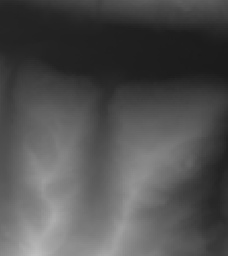

In [3]:
# preview image to be exported
image = dem.visualize(**{ 'min': 3800, 'max': 5260 })

# generate url to image thumbnail
url = image.getThumbUrl({'region': region.getInfo(), 'dimensions': 256})

# display image
Image(url=url, embed=True, format='png')

In [4]:
# schedule a new export image task, here we will export to Google Drive
file_name = 'dem'
export_region = region.getInfo()['coordinates'] # BUG: it should just accept region as-is
task = ee.batch.Export.image.toDrive(dem, description=file_name, fileNamePrefix=file_name, region=export_region, scale=30)
task.start()

# remember task id and use it to check tasks status later
task_id = task.id
print(task_id)

TB3XLZMCTWDV2VTXQAJMXS4H


In [5]:
# create a new task using id
task = ee.batch.Task(task_id)

In [6]:
# query task status, it should go from READY -> RUNNING -> COMPLETED
task.status()

{'id': 'TB3XLZMCTWDV2VTXQAJMXS4H',
 'state': 'RUNNING',
 'creation_timestamp_ms': 1531552170636,
 'update_timestamp_ms': 1531552175455,
 'description': 'dem',
 'task_type': 'EXPORT_IMAGE',
 'start_timestamp_ms': 1531552175272,
 'progress': 0.0}

Tasks state can be one of: 

* __READY__
* __RUNNING__
* __COMPLETED__
* __CANCELLED__
* __CANCEL_REQUESTED__
* __FAILED__

TODO: embed state diagram here

TODO: show how to fetch results from Google Drive

In [7]:
# query current user tasks
tasks = ee.batch.Task.list()

print(len(tasks))
print(tasks[0])

1
<Task EXPORT_IMAGE: dem (COMPLETED)>
